In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from natsort import natsorted

In [2]:
# data = np.load('elevation_sol_0.npy')

In [3]:
# print(data.shape)

In [4]:
# plt.matshow(data[:, :, 49])

In [5]:
path = 'Data/ice data/xyu/'
file_names = os.listdir(path)
sorted_file_names = natsorted(file_names)
print(len(sorted_file_names))

160


In [8]:
# data_total = np.load(path+sorted_file_names[1])
# print(data_total.shape)
data_total = []
for file in range(0, len(sorted_file_names)):
    data = np.load(path+sorted_file_names[file])
    data_total.append(data)

data_total = np.array(data_total)
# data_total.permute(3, 1, 2, 0)

In [9]:
print(data_total.shape)

(160, 64, 64, 50)


In [10]:
np.save("Data/ice data/data_xyu.npy", data_total)

In [11]:
data = np.load("Data/ice data/data_xyu.npy")

In [12]:
print(data.shape)

(160, 64, 64, 50)


In [13]:
data_flat = data.flatten()

In [14]:
print(data_flat.shape)
print("maximum value: ", max(data_flat))
print("minimum value: ", min(data_flat))
print("mean value: ", np.mean(data_flat))
print("variance: ", np.var(data_flat))
print("std: ", np.sqrt(np.var(data_flat)))

(32768000,)
maximum value:  11245.325737716947
minimum value:  11.176991157967365
mean value:  235.10356811068345
variance:  207004.23061836825
std:  454.9771759312419


In [15]:
def add_noise(mean, std, data):
    for i in range(data.shape[0]):
        for j in range(data.shape[3]):
            noise = np.random.normal(mean, std, (data.shape[1], data.shape[2]))
            data[i, :, :, j] += noise
    return data

In [16]:
mean = 0
stddev = 2
# noise = np.random.normal(mean, stddev, (64, 64))
# print(noise.shape)
# print(noise[0, 34])
noisy_data = add_noise(mean, stddev, data)

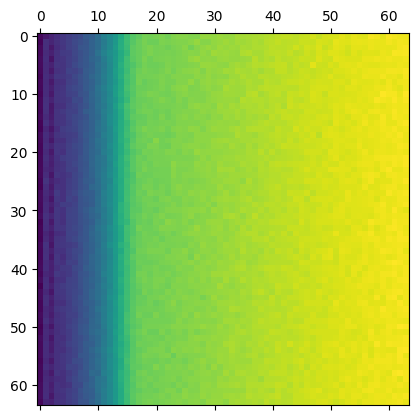

In [17]:
plt.matshow(noisy_data[0][:, :, 40])

In [18]:
np.save("Data/ice data/noisy_xyu.npy", noisy_data)